In [4]:
from IPython import parallel
rc = parallel.Client()
dv = rc[:]
rc.ids

[0, 1, 2, 3]

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import dask.dataframe as dd
import numpy as np
import pandas as pd
import pickle

def marshall_palmer(ref, minutes_past):
    #minutes_past = df['minutes_past']

    minutes_in_segment = 60.0
    valid_time = minutes_past.diff()
    valid_time.iloc[0] = minutes_past.iloc[0]
    valid_time.iloc[-1] = valid_time.iloc[-1] + minutes_in_segment - np.sum(valid_time)
    valid_time = valid_time/60.0
    valid_time = valid_time[np.isfinite(ref)]
    ref = ref[np.isfinite(ref)]
    mmperhr = np.dot(pow(pow(10, ref/10)/200, 0.625), valid_time)
    return mmperhr

def operate_on_each_hour(hour):
    hour = hour.sort('minutes_past', ascending=True)
    gauge_estimate = marshall_palmer(hour['Ref'], hour['minutes_past'])
    #hour['gauge_estimated'] = gauge_estimate
    return gauge_estimate



In [13]:
%time
traindata = dd.read_csv('../data/train.csv')
traindata = traindata.set_index('Id')
#groups = traindata.groupby(traindata.index)

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 23.1 µs


In [15]:
%%px
def marshall_palmer(ref, minutes_past):
    #minutes_past = df['minutes_past']

    minutes_in_segment = 60.0
    valid_time = minutes_past.diff()
    valid_time.iloc[0] = minutes_past.iloc[0]
    valid_time.iloc[-1] = valid_time.iloc[-1] + minutes_in_segment - np.sum(valid_time)
    valid_time = valid_time/60.0
    valid_time = valid_time[np.isfinite(ref)]
    ref = ref[np.isfinite(ref)]
    mmperhr = np.dot(pow(pow(10, ref/10)/200, 0.625), valid_time)
    return mmperhr

def operate_on_each_hour(hour):
    hour = hour.sort('minutes_past', ascending=True)
    gauge_estimate = marshall_palmer(hour['Ref'], hour['minutes_past'])
    #hour['gauge_estimated'] = gauge_estimate
    return gauge_estimate


In [28]:
traindata.join(grouped_vals, on='Ref', suffix='r_')

TypeError: join() got an unexpected keyword argument 'suffix'

In [16]:
%time
traindata = pd.read_csv('../data/train.csv')
traindata = traindata.set_index('Id')


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


In [20]:
%time
traindata['estimated'] = traindata.groupby(traindata.index).apply(operate_on_each_hour)
traindata['estimated']

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


/home/saket/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Id
1          0.000000
1          0.000000
1          0.000000
1          0.000000
1          0.000000
1          0.000000
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
2          0.630814
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
3          0.000000
             ...   
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180944    1.365416
1180945    3.579249
1180945    3.5792

In [21]:
"""
plt.rcParams['figure.figsize'] = (10.0, 8.0)
gauge_expected = [];
gauge_observed = [];

for groupname, group in groups:
    expected = marshall_palmer(group['Ref'], group['minutes_past'])
    observed = group['Expected'].mean()
    gauge_observed.append(observed)
    gauge_expected.append(expected)

plt.plot(gauge_expected, gauge_observed)
"""

"\nplt.rcParams['figure.figsize'] = (10.0, 8.0)\ngauge_expected = [];\ngauge_observed = [];\n\nfor groupname, group in groups:\n    expected = marshall_palmer(group['Ref'], group['minutes_past'])\n    observed = group['Expected'].mean()\n    gauge_observed.append(observed)\n    gauge_expected.append(expected)\n\nplt.plot(gauge_expected, gauge_observed)\n"

In [22]:
%load_ext cythonmagic




/home/saket/anaconda/lib/python2.7/site-packages/IPython/extensions/cythonmagic.py:21: UserWarning: The Cython magic has been moved to the Cython package
  warnings.warn("""The Cython magic has been moved to the Cython package""")


In [ ]:
%%cython
def marshall_palmer(ref, minutes_past):
    #minutes_past = df['minutes_past']

    minutes_in_segment = 60.0
    valid_time = minutes_past.diff()
    valid_time.iloc[0] = minutes_past.iloc[0]
    valid_time.iloc[-1] = valid_time.iloc[-1] + minutes_in_segment - np.sum(valid_time)
    valid_time = valid_time/60.0
    valid_time = valid_time[np.isfinite(ref)]
    ref = ref[np.isfinite(ref)]
    mmperhr = np.dot(pow(pow(10, ref/10)/200, 0.625), valid_time)
    return mmperhr

def operate_on_each_hour(hour):
    hour = hour.sort('minutes_past', ascending=True)
    gauge_estimate = marshall_palmer(hour['Ref'], hour['minutes_past'])
    #hour['gauge_estimated'] = gauge_estimate
    return gauge_estimate

In [ ]:
%time
traindata['estimated'] = traindata.groupby(traindata.index).apply(operate_on_each_hour)
traindata['estimated']

In [27]:
traindata.to_hdf('traindata_preprocessed.h5', 'traindata_preprocessed', format = 'fixed', mode='w', dropna=False, complevel=9)

In [28]:
read_from_hdf5 = pd.read_hdf('traindata_preprocessed.h5')


In [29]:
read_from_hdf5 = pd.read_hdf('traindata_preprocessed.h5')


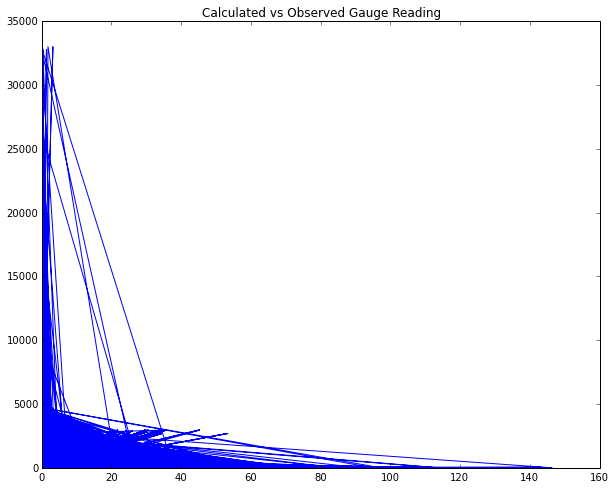

In [34]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.plot(read_from_hdf5.estimated, read_from_hdf5.Expected)
plt.title('Calculated vs Observed Gauge Reading')

In [35]:
stats = read_from_hdf5.Expected.describe()
stats

count    13765201.000000
mean          108.626306
std           548.605805
min             0.010000
25%             0.254000
50%             1.016000
75%             3.810002
max         33017.730000
Name: Expected, dtype: float64